# monitoreo de la Nivel calidad del agua, interpretar y utilizar eficazmente la información recopilada en sus actividades de gestión.

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
# Librerias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/Inteligecia Artificial l/Laboratorio 1/sandy_ck_homebush_joined.csv')

In [4]:
#ver el dataset
print(data)

                 Timestamp  Conductivity  NO3   Q   Temp  Turbidity  Level  \
0      2016-12-05T18:00:00         486.0  NaN NaN  29.05        5.7  0.474   
1      2016-12-05T19:00:00           NaN  NaN NaN    NaN        NaN  0.473   
2      2016-12-05T20:00:00         485.0  NaN NaN  28.36        7.7  0.474   
3      2016-12-05T21:00:00         485.0  NaN NaN  28.08        2.7  0.475   
4      2016-12-05T22:00:00           NaN  NaN NaN    NaN        NaN  0.474   
...                    ...           ...  ...  ..    ...        ...    ...   
35827  2016-12-05T13:00:00           NaN  NaN NaN    NaN        NaN  0.461   
35828  2016-12-05T14:00:00           NaN  NaN NaN    NaN        NaN  0.462   
35829  2016-12-05T15:00:00           NaN  NaN NaN    NaN        NaN  0.462   
35830  2016-12-05T16:00:00           NaN  NaN NaN    NaN        NaN  0.462   
35831  2016-12-05T17:00:00           NaN  NaN NaN    NaN        NaN  0.473   

       Dayofweek  Month  
0              0     12  
1          

In [5]:
# informacion de los tipos de valores
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35832 entries, 0 to 35831
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     35832 non-null  object 
 1   Conductivity  21787 non-null  float64
 2   NO3           12426 non-null  float64
 3   Q             15592 non-null  float64
 4   Temp          21787 non-null  float64
 5   Turbidity     21787 non-null  float64
 6   Level         35752 non-null  float64
 7   Dayofweek     35832 non-null  int64  
 8   Month         35832 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 2.5+ MB


In [6]:
# Extracción de la fecha y conversión a formato de fecha
data['Timestamp'] = pd.to_datetime(data['Timestamp'].str.split('T').str[0], format='%Y-%m-%d')

# Mostrar el conjunto de datos resultante
print(data)

       Timestamp  Conductivity  NO3   Q   Temp  Turbidity  Level  Dayofweek  \
0     2016-12-05         486.0  NaN NaN  29.05        5.7  0.474          0   
1     2016-12-05           NaN  NaN NaN    NaN        NaN  0.473          0   
2     2016-12-05         485.0  NaN NaN  28.36        7.7  0.474          0   
3     2016-12-05         485.0  NaN NaN  28.08        2.7  0.475          0   
4     2016-12-05           NaN  NaN NaN    NaN        NaN  0.474          0   
...          ...           ...  ...  ..    ...        ...    ...        ...   
35827 2016-12-05           NaN  NaN NaN    NaN        NaN  0.461          0   
35828 2016-12-05           NaN  NaN NaN    NaN        NaN  0.462          0   
35829 2016-12-05           NaN  NaN NaN    NaN        NaN  0.462          0   
35830 2016-12-05           NaN  NaN NaN    NaN        NaN  0.462          0   
35831 2016-12-05           NaN  NaN NaN    NaN        NaN  0.473          0   

       Month  
0         12  
1         12  
2     

In [7]:
# informacion de los tipos de valores
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35832 entries, 0 to 35831
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     35832 non-null  datetime64[ns]
 1   Conductivity  21787 non-null  float64       
 2   NO3           12426 non-null  float64       
 3   Q             15592 non-null  float64       
 4   Temp          21787 non-null  float64       
 5   Turbidity     21787 non-null  float64       
 6   Level         35752 non-null  float64       
 7   Dayofweek     35832 non-null  int64         
 8   Month         35832 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 2.5 MB


In [8]:
#Mover la columna objetivo al final
columna_objetivo = 'Level'

# Obtén una lista de todas las columnas en el orden actual
columnas_ordenadas = list(data.columns)

# Mueve la columna objetivo al final
columnas_ordenadas.remove(columna_objetivo)  # Elimina la columna objetivo de su posición actual
columnas_ordenadas.append(columna_objetivo)  # Añade la columna objetivo al final de la lista

# Reorganiza el DataFrame con el nuevo orden de columnas
data = data[columnas_ordenadas]


In [9]:

print(data)

       Timestamp  Conductivity  NO3   Q   Temp  Turbidity  Dayofweek  Month  \
0     2016-12-05         486.0  NaN NaN  29.05        5.7          0     12   
1     2016-12-05           NaN  NaN NaN    NaN        NaN          0     12   
2     2016-12-05         485.0  NaN NaN  28.36        7.7          0     12   
3     2016-12-05         485.0  NaN NaN  28.08        2.7          0     12   
4     2016-12-05           NaN  NaN NaN    NaN        NaN          0     12   
...          ...           ...  ...  ..    ...        ...        ...    ...   
35827 2016-12-05           NaN  NaN NaN    NaN        NaN          0     12   
35828 2016-12-05           NaN  NaN NaN    NaN        NaN          0     12   
35829 2016-12-05           NaN  NaN NaN    NaN        NaN          0     12   
35830 2016-12-05           NaN  NaN NaN    NaN        NaN          0     12   
35831 2016-12-05           NaN  NaN NaN    NaN        NaN          0     12   

       Level  
0      0.474  
1      0.473  
2     

In [10]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [11]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [12]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [13]:
#resultado
print(data)

          Timestamp  Conductivity  NO3   Q   Temp  Turbidity  Dayofweek  \
0      1.480896e+09         486.0  NaN NaN  29.05        5.7          0   
1      1.480896e+09           NaN  NaN NaN    NaN        NaN          0   
2      1.480896e+09         485.0  NaN NaN  28.36        7.7          0   
3      1.480896e+09         485.0  NaN NaN  28.08        2.7          0   
4      1.480896e+09           NaN  NaN NaN    NaN        NaN          0   
...             ...           ...  ...  ..    ...        ...        ...   
35827  1.480896e+09           NaN  NaN NaN    NaN        NaN          0   
35828  1.480896e+09           NaN  NaN NaN    NaN        NaN          0   
35829  1.480896e+09           NaN  NaN NaN    NaN        NaN          0   
35830  1.480896e+09           NaN  NaN NaN    NaN        NaN          0   
35831  1.480896e+09           NaN  NaN NaN    NaN        NaN          0   

       Month  Level  
0         12  0.474  
1         12  0.473  
2         12  0.474  
3         1

In [14]:
# informacion de los tipos de valores
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35832 entries, 0 to 35831
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     35832 non-null  float64
 1   Conductivity  21787 non-null  float64
 2   NO3           12426 non-null  float64
 3   Q             15592 non-null  float64
 4   Temp          21787 non-null  float64
 5   Turbidity     21787 non-null  float64
 6   Dayofweek     35832 non-null  int64  
 7   Month         35832 non-null  int64  
 8   Level         35752 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 2.5 MB


In [15]:
#llenar datos vacios
columnas_especificas = ['Conductivity', 'NO3','Q','Temp','Turbidity','Level']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35832 entries, 0 to 35831
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     35832 non-null  float64
 1   Conductivity  35832 non-null  float64
 2   NO3           35832 non-null  float64
 3   Q             35832 non-null  float64
 4   Temp          35832 non-null  float64
 5   Turbidity     35832 non-null  float64
 6   Dayofweek     35832 non-null  int64  
 7   Month         35832 non-null  int64  
 8   Level         35832 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 2.5 MB


In [17]:
# Lectura de Datos
X = data.iloc[:, :8]
y = data.iloc[:, 8]
m = y.size

In [18]:
print(X)
print('Columna Objetivo  -  '*3)
print(y)

          Timestamp  Conductivity       NO3         Q       Temp  Turbidity  \
0      1.480896e+09    486.000000  0.437671  4.777473  29.050000   5.700000   
1      1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
2      1.480896e+09    485.000000  0.437671  4.777473  28.360000   7.700000   
3      1.480896e+09    485.000000  0.437671  4.777473  28.080000   2.700000   
4      1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
...             ...           ...       ...       ...        ...        ...   
35827  1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
35828  1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
35829  1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
35830  1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
35831  1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   

       Dayofweek  Month  
0              0     12  

In [19]:
# Normalizacion
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normaliza entre -0.5 y 0.5 (revisar) porque se dan valores negativos y postivos

In [20]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

          Timestamp  Conductivity       NO3         Q       Temp  Turbidity  \
0      1.480896e+09    486.000000  0.437671  4.777473  29.050000   5.700000   
1      1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
2      1.480896e+09    485.000000  0.437671  4.777473  28.360000   7.700000   
3      1.480896e+09    485.000000  0.437671  4.777473  28.080000   2.700000   
4      1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
...             ...           ...       ...       ...        ...        ...   
35827  1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
35828  1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
35829  1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
35830  1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   
35831  1.480896e+09    502.039358  0.437671  4.777473  23.812395  13.873643   

       Dayofweek  Month  
0              0     12  

In [21]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [22]:
print(X)

[[ 1.00000000e+00 -1.08354710e+00 -1.01213782e-01 ... -4.24408388e-01
  -1.49937272e+00  1.60975657e+00]
 [ 1.00000000e+00 -1.08354710e+00 -7.17402443e-16 ...  9.22355876e-17
  -1.49937272e+00  1.60975657e+00]
 [ 1.00000000e+00 -1.08354710e+00 -1.07524121e-01 ... -3.20560349e-01
  -1.49937272e+00  1.60975657e+00]
 ...
 [ 1.00000000e+00 -1.08354710e+00 -7.17402443e-16 ...  9.22355876e-17
  -1.49937272e+00  1.60975657e+00]
 [ 1.00000000e+00 -1.08354710e+00 -7.17402443e-16 ...  9.22355876e-17
  -1.49937272e+00  1.60975657e+00]
 [ 1.00000000e+00 -1.08354710e+00 -7.17402443e-16 ...  9.22355876e-17
  -1.49937272e+00  1.60975657e+00]]


In [23]:
def calcularCosto(X, y, theta,lambda_):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)

  #Sin REGULARIZACION
  #J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  #CON REGULARIZACION
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))+ (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
  return J


In [29]:
# implementación del algoritmo de descenso de gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters, lambda_):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        #Sin regularizacion
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        #Con regularizacion
        #theta[1:] += (lambda_ / m) * theta[1:]

        J_history.append(calcularCosto(X, y, theta, lambda_))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 0.71537533  0.00234552 -0.07767502  0.01274515  0.31070382 -0.04608345
  0.23425388 -0.00609362 -0.0801392 ]
El nivel predecido es (usando el descenso por el gradiente): 1.5244


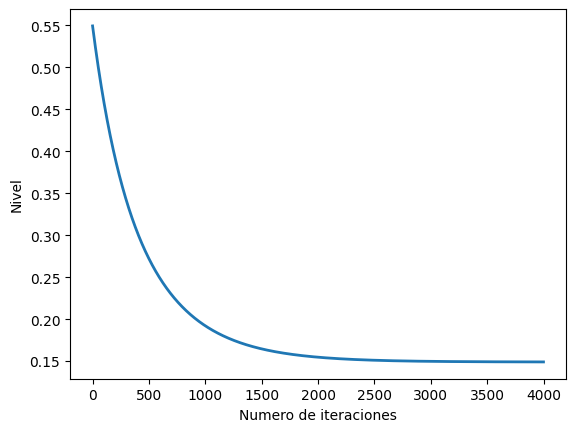

In [30]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # si es grande se resta más a los thetas, si es menor alfa va cambiando poco a poco
#se necesitan muchas iteraciones, si es grande el alfa salta mucho y no llega facilmente
# mejores alfas = 0.1, 0.01, 0.001, 0.0001, 0.0005
num_iters = 4000
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)
lambda_ = 0.1
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters, lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Nivel')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el nivel con distintas caracteristicas
X_array = [1, 480, 1, 1, 27.10, 7.0, 0.48, 12, 4]
X_array[1:9] = (X_array[1:13] - mu) / sigma
level = np.dot(X_array, theta)   # Se debe cambiar esto

print('El nivel predecido es (usando el descenso por el gradiente): {:.4f}'.format(level))

Proceso: usando la Ecuacion de la normal


In [31]:
# importante que para usar m>n, evitar datos redundantes, no se normaliza
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [32]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios
X_array = [1, 487, 1, 1, 28.10, 7.0, 0.48, 12, 4]
level = np.dot(X_array, theta)

print('El nivel de agua predecido (usando la ecuación de la normal): N.deA: {: .0f}'.format(level))

Theta calculado a partir de la ecuación de la normal: [ 0.72869516  0.00271713 -0.07115308  0.01232711  0.31560529 -0.04551237
  0.23737977 -0.00581806 -0.08070132]
El nivel de agua predecido (usando la ecuación de la normal): N.deA:  10
